In [1]:
import pandas as pd

In [2]:
# Read Feather and CSV files into individual DataFrames
sentinel_2017 = pd.read_feather("hawaii_processed_data/hawaii_sentinel_2017_processed.feather")
sentinel_2021 = pd.read_feather("hawaii_processed_data/hawaii_sentinel_2021_processed.feather")
sentinel_2024 = pd.read_feather("hawaii_processed_data/hawaii_sentinel_2024_processed.feather")
sentinel_corrected = pd.read_csv("hawaii_processed_data/sentinel_data_corrected_no_na.csv")

In [3]:
# Add year column to each DataFrame
sentinel_2017["year"] = 2017
sentinel_2021["year"] = 2021
sentinel_2024["year"] = 2024
sentinel_corrected["year"] = "spice_summer"

In [4]:
print("Sentinel 2017 Columns:", list(sentinel_2017.columns))
print("\nSentinel 2021 Columns:", list(sentinel_2021.columns))
print("\nSentinel 2024 Columns:", list(sentinel_2024.columns))
print("\nSentinel Corrected Columns:", list(sentinel_corrected.columns))


Sentinel 2017 Columns: ['latitude', 'longitude', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8A', 'B11', 'B12', 'PI', 'NDWI', 'WRI', 'AWEI', 'MNDWI', 'SR', 'RNDVI', 'ARI', 'MARI', 'CHL_RedEdge', 'REPI', 'EVI', 'EVI2', 'GNDVI', 'MCARI', 'MSI', 'NDMI', 'NBR', 'NDSI', 'SAVI', 'OSI', 'PNDVI', 'NDVI', 'FDI', 'year']

Sentinel 2021 Columns: ['latitude', 'longitude', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8A', 'B11', 'B12', 'PI', 'NDWI', 'WRI', 'AWEI', 'MNDWI', 'SR', 'RNDVI', 'ARI', 'MARI', 'CHL_RedEdge', 'REPI', 'EVI', 'EVI2', 'GNDVI', 'MCARI', 'MSI', 'NDMI', 'NBR', 'NDSI', 'SAVI', 'OSI', 'PNDVI', 'NDVI', 'FDI', 'year']

Sentinel 2024 Columns: ['latitude', 'longitude', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8A', 'B11', 'B12', 'PI', 'NDWI', 'WRI', 'AWEI', 'MNDWI', 'SR', 'RNDVI', 'ARI', 'MARI', 'CHL_RedEdge', 'REPI', 'EVI', 'EVI2', 'GNDVI', 'MCARI', 'MSI', 'NDMI', 'NBR', 'NDSI', 'SAVI', 'OSI', 'PNDVI', 'NDVI', 'FDI', 'year']

Sentinel Corrected Columns: ['latitude', 'longitude', 'B01

In [6]:
sentinel_corrected = sentinel_corrected.rename(columns={'B01_20m': 'B1'})

In [7]:
# Select only the required columns from each DataFrame
selected_columns = ['NDSI', 'MNDWI', 'NDWI', 'OSI', 'FDI', 'B1', 'year']

sentinel_2017 = sentinel_2017[selected_columns]
sentinel_2021 = sentinel_2021[selected_columns]
sentinel_2024 = sentinel_2024[selected_columns]
sentinel_corrected = sentinel_corrected[selected_columns]


In [8]:
# Merge all DataFrames
merged_df = pd.concat([sentinel_2017, sentinel_2021, sentinel_2024, sentinel_corrected], ignore_index=True)


In [9]:
merged_df

,NDSI,MNDWI,NDWI,OSI,FDI,B1,year
0,0.059633,0.084003,0.041714,1.716741,71.254978,1,2017
1,0.046154,0.060241,0.024868,1.710953,95.699083,150,2017
2,0.054125,0.067980,0.036711,1.782721,95.965546,321,2017
3,0.058289,0.073751,0.047191,1.676780,61.977031,363,2017
4,0.052469,0.070911,0.034901,1.732725,60.216310,342,2017
...,...,...,...,...,...,...,...
20925196,0.032219,0.037263,0.027223,1.747785,-116426.832029,1326,spice_summer
20925197,0.012518,0.033888,0.022640,1.836853,-34.777026,1386,spice_summer
20925198,0.021422,0.037424,0.006190,1.927341,-116364.190184,1444,spice_summer
20925199,0.022929,0.024495,0.002096,1.803728,-116359.291517,1327,spice_summer


/var/folders/yg/p0mpnbs57bl5945wlhr72jg80000gn/T/ipykernel_22981/233084186.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x="year", y="NDSI", palette="tab10")


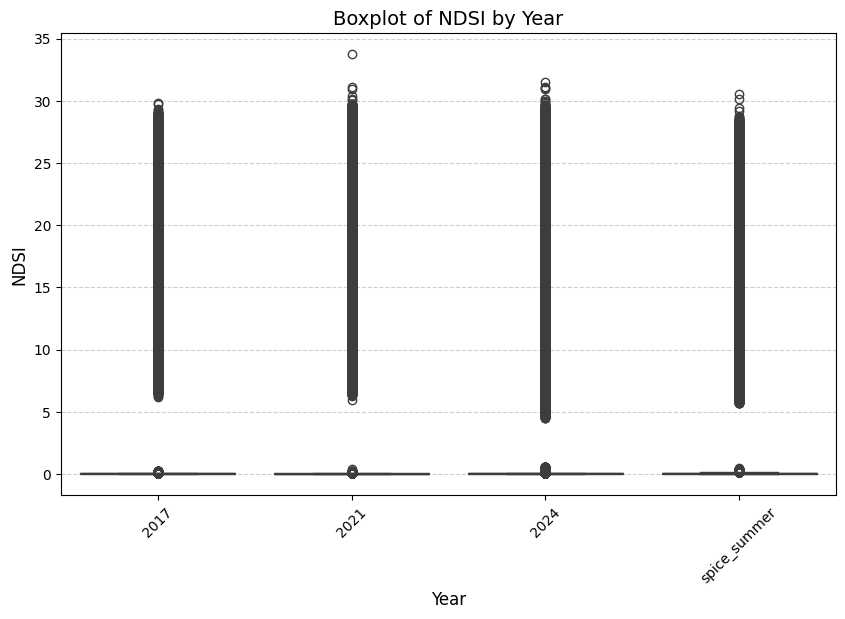

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x="year", y="NDSI", palette="tab10")

# Customize plot
plt.title("Boxplot of NDSI by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("NDSI", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show plot
plt.show()

/var/folders/yg/p0mpnbs57bl5945wlhr72jg80000gn/T/ipykernel_87151/108393820.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x="year", y="B1", palette="tab10")


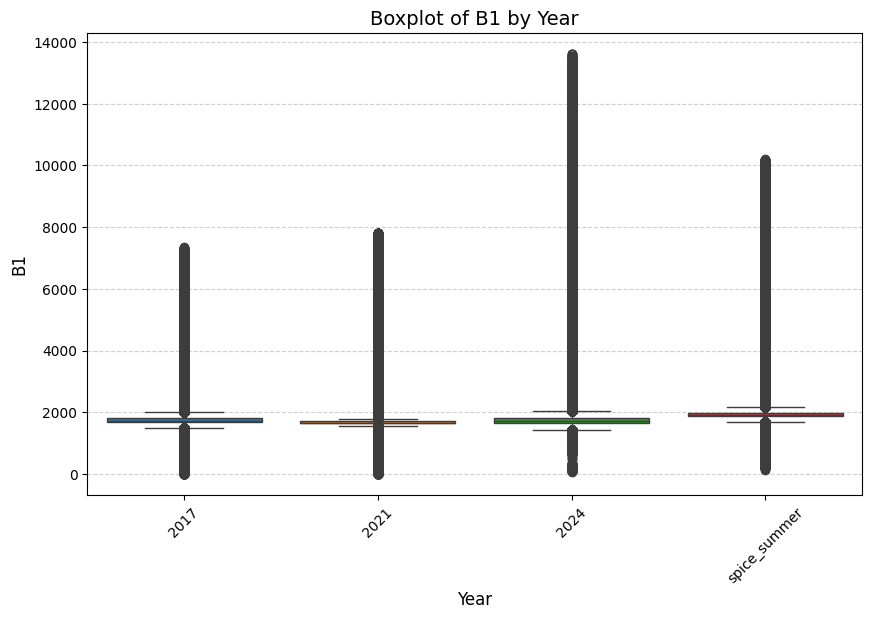

In [17]:
# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x="year", y="B1", palette="tab10")

# Customize plot
plt.title("Boxplot of B1 by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("B1", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show plot
plt.show()

/var/folders/yg/p0mpnbs57bl5945wlhr72jg80000gn/T/ipykernel_22981/2380012961.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x="year", y="MNDWI", palette="tab10")


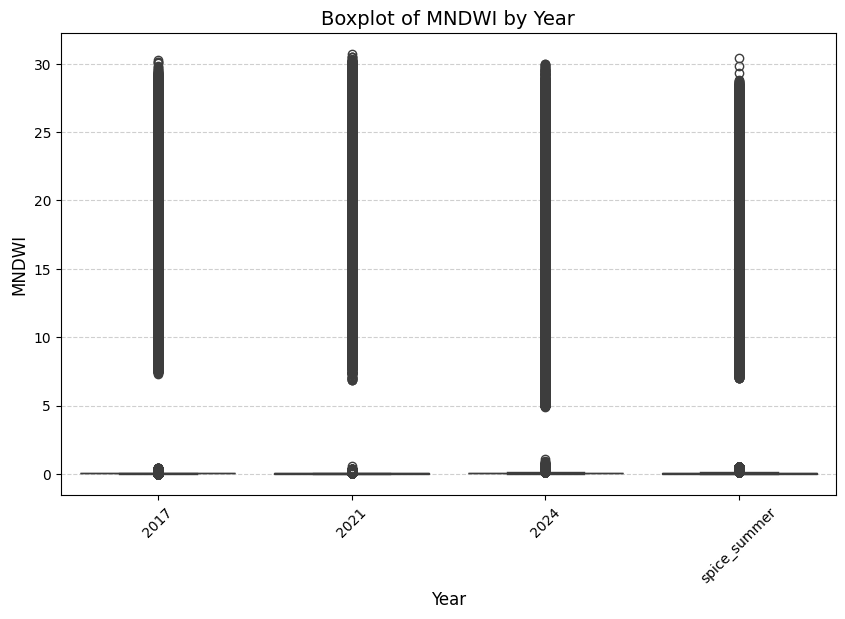

In [11]:
# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x="year", y="MNDWI", palette="tab10")

# Customize plot
plt.title("Boxplot of MNDWI by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("MNDWI", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show plot
plt.show()

/var/folders/yg/p0mpnbs57bl5945wlhr72jg80000gn/T/ipykernel_22981/1006417215.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x="year", y="OSI", palette="tab10")


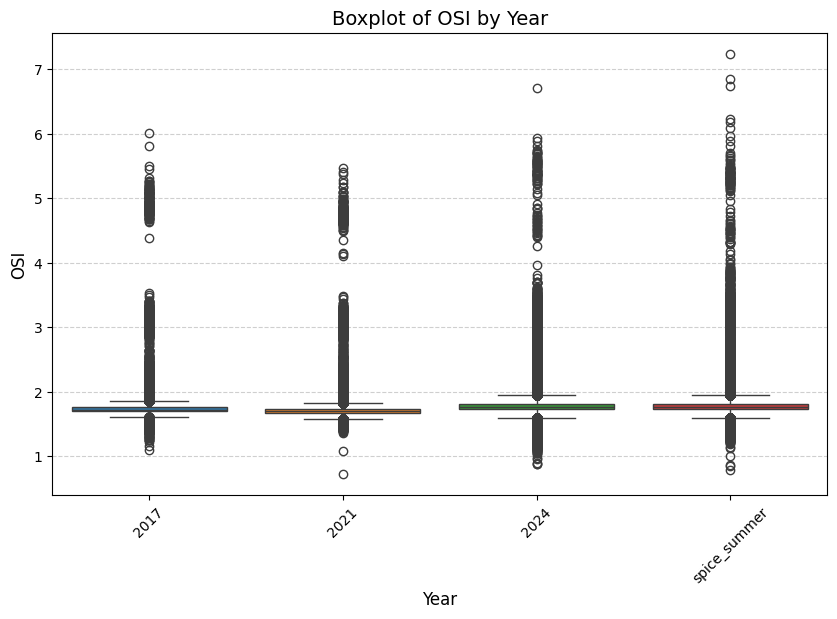

In [12]:
# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x="year", y="OSI", palette="tab10")

# Customize plot
plt.title("Boxplot of OSI by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("OSI", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show plot
plt.show()

/var/folders/yg/p0mpnbs57bl5945wlhr72jg80000gn/T/ipykernel_22981/29793465.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x="year", y="FDI", palette="tab10")


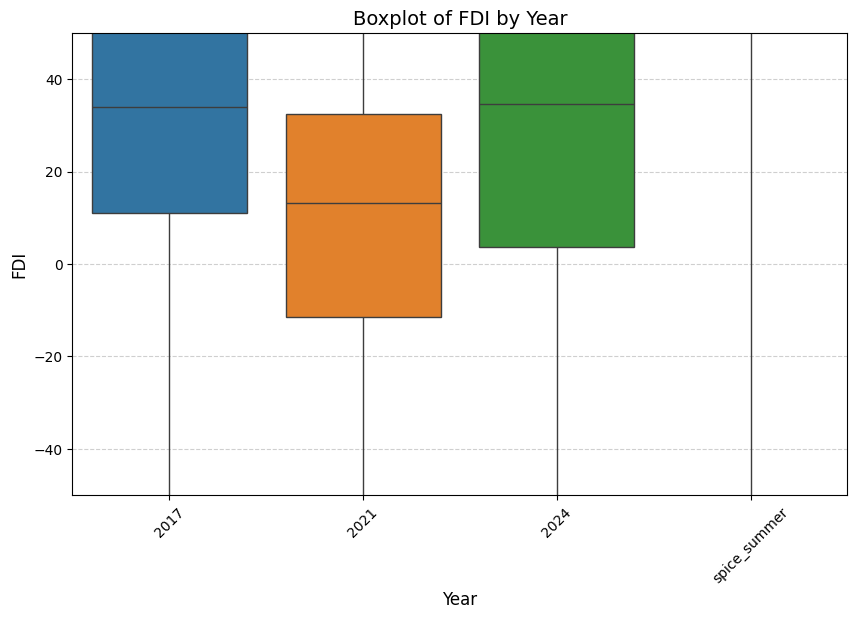

In [16]:
# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x="year", y="FDI", palette="tab10")

# Customize plot
plt.title("Boxplot of FDI by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("FDI", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.ylim(-50,50)

# Show plot
plt.show()

/var/folders/yg/p0mpnbs57bl5945wlhr72jg80000gn/T/ipykernel_22981/1589873564.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x="year", y="NDWI", palette="tab10")


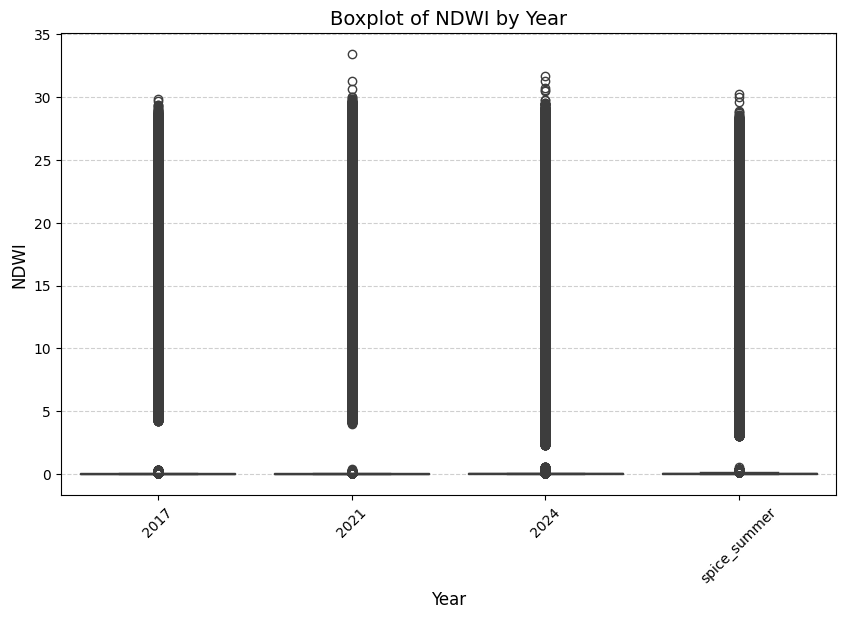

In [17]:
# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x="year", y="NDWI", palette="tab10")

# Customize plot
plt.title("Boxplot of NDWI by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("NDWI", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show plot
plt.show()